In [78]:
import pandas as pd
import numpy as np

import os, glob
import sys
import librosa
import librosa.display
import IPython.display as ipd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio



In [79]:
import os
import pandas as pd

# Path ke folder dataset TESS Toronto emotional speech set data
dataset_path = "dataset/TESS Toronto emotional speech set data"

# Daftar emosi yang akan dikelompokkan
emotions_map = {
    "angry": "angry",
    "disgust": "disgust",
    "fear": "fear",
    "happy": "happy",
    "neutral": "neutral",
    "pleasant_surprise": "surprise",
    "sad": "sad",
}

# Menyimpan data path dan label emosi
data = []

# Iterasi melalui folder dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".wav"):
            # Mengambil emosi dari nama folder
            folder_name = os.path.basename(root)
            for key in emotions_map.keys():
                if key in folder_name.lower():
                    emotion_label = emotions_map[key]
                    file_path = os.path.join(root, file)
                    data.append({"emotion": emotion_label, "Path": file_path})
                    break

# Membuat dataframe
df = pd.DataFrame(data)
df


,emotion,Path
0,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav
1,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bar_angry.wav
2,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_base_angry.wav
3,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bath_angry.wav
4,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bean_angry.wav
...,...,...
2795,sad,dataset/TESS Toronto emotional speech set data\YAF_sad\YAF_witch_sad.wav
2796,sad,dataset/TESS Toronto emotional speech set data\YAF_sad\YAF_yearn_sad.wav
2797,sad,dataset/TESS Toronto emotional speech set data\YAF_sad\YAF_yes_sad.wav
2798,sad,dataset/TESS Toronto emotional speech set data\YAF_sad\YAF_young_sad.wav


In [80]:
df
ok = df['emotion']
ok.unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad'],
      dtype=object)

##### Feature Engineering #####

Dengan MFCC


In [81]:
# Feature engineering using MFCC
def mfcc(file_path, n_mfcc=13):
  audio, src = librosa.load(file_path)
  mfccs = librosa.feature.mfcc(y=audio, sr=src, n_mfcc=n_mfcc)
  mfccs = np.mean(mfccs.T, axis=0)
  return mfccs

df['MFCC'] = df['Path'].apply(lambda x: mfcc(x))
audio_df = pd.DataFrame(df['MFCC'].values.tolist(), columns=[f'mfcc_{i}' for i in range(1, 14)])
audio_df = pd.concat([df, audio_df], axis=1)
audio_df.head()


,emotion,Path,MFCC,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav,"[-383.43262, 52.460808, -17.608944, -11.81031, -4.70763, 7.513892, -25.082636, -6.9484596, -10.093307, -3.2549365, 0.2810377, 0.656697, 2.0474987]",-383.432617,52.460808,-17.608944,-11.810310,-4.707630,7.513892,-25.082636,-6.948460,-10.093307,-3.254936,0.281038,0.656697,2.047499
1,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bar_angry.wav,"[-444.5501, 65.29204, -2.571654, -20.355955, -10.516433, 10.241208, -9.607936, -1.3553095, -12.456924, 2.8278713, -9.535598, 9.995903, -0.79107744]",-444.550110,65.292038,-2.571654,-20.355955,-10.516433,10.241208,-9.607936,-1.355309,-12.456924,2.827871,-9.535598,9.995903,-0.791077
2,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_base_angry.wav,"[-402.1927, 26.256584, -5.02363, -0.40751916, -0.9522235, 0.9130459, -19.256067, -2.4602304, -13.165889, -1.0565393, -12.630616, 7.668492, -0.7637201]",-402.192688,26.256584,-5.023630,-0.407519,-0.952223,0.913046,-19.256067,-2.460230,-13.165889,-1.056539,-12.630616,7.668492,-0.763720
3,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bath_angry.wav,"[-383.49704, 52.38679, -11.5349, -13.975939, -3.9067535, 6.814112, -21.693228, -7.6809745, -13.304781, -3.16933, -1.6435299, 1.3886418, 0.60374653]",-383.497040,52.386791,-11.534900,-13.975939,-3.906754,6.814112,-21.693228,-7.680974,-13.304781,-3.169330,-1.643530,1.388642,0.603747
4,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bean_angry.wav,"[-398.56268, 51.876442, 3.3703012, 8.665921, 3.880992, 0.7320454, -24.158323, 7.4863, -19.511463, -12.444627, -11.40149, -1.8055327, -4.8490553]",-398.562683,51.876442,3.370301,8.665921,3.880992,0.732045,-24.158323,7.486300,-19.511463,-12.444627,-11.401490,-1.805533,-4.849055


Dengan Chroma

In [82]:
def chroma(path):
  audio, src = librosa.load(path)
  chroma = librosa.feature.chroma_stft(y=audio, sr=src)
  mean_chroma = np.mean(chroma, axis=1) #calculate chroma
  return mean_chroma

df['Chroma'] = df['Path'].apply(lambda x: chroma(x))
audio_df_1 = pd.DataFrame(df['Chroma'].values.tolist(), columns=[f'chroma_{i}' for i in range(1, 13)])
audio_df_1.head()

,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12
0,0.492836,0.528646,0.275086,0.170452,0.214984,0.231474,0.226501,0.307024,0.335488,0.241377,0.267549,0.367663
1,0.588383,0.413288,0.235997,0.226955,0.304640,0.310315,0.215998,0.220696,0.194078,0.192749,0.241243,0.319573
2,0.401296,0.516730,0.314151,0.235790,0.238390,0.240270,0.191000,0.175659,0.200226,0.243480,0.342305,0.374666
3,0.475549,0.316693,0.201360,0.213808,0.209452,0.250078,0.288495,0.300834,0.295789,0.248572,0.271678,0.437583
4,0.407338,0.482799,0.374400,0.254616,0.185320,0.167119,0.114360,0.126492,0.187380,0.211117,0.223905,0.206941


Dengan Delta

In [83]:
def mfcc_delta(file_path, n_mfcc=13):
  audio, src = librosa.load(file_path)
  mfccs = librosa.feature.mfcc(y=audio, sr=src, n_mfcc=n_mfcc)
  mfccs_delta = librosa.feature.delta(mfccs)
  mfccs_delta = np.mean(mfccs_delta.T, axis=0)
  return mfccs_delta

def mfcc_delta2(file_path, n_mfcc=13):
  audio, src = librosa.load(file_path)
  mfccs = librosa.feature.mfcc(y=audio, sr=src, n_mfcc=n_mfcc)
  mfccs_delta2 = librosa.feature.delta(mfccs, order=2)
  mfccs_delta2 = np.mean(mfccs_delta2.T, axis=0)
  return  mfccs_delta2

df['MFCC_Delta'] = df['Path'].apply(lambda x: mfcc_delta(x))
audio_df_2 = pd.DataFrame(df['MFCC_Delta'].values.tolist(), columns=[f'mfcc_delta_{i}' for i in range(1, 14)])
audio_df_2.head()

df['MFCC_Delta2'] = df['Path'].apply(lambda x: mfcc_delta2(x))
audio_df_3 = pd.DataFrame(df['MFCC_Delta2'].values.tolist(), columns=[f'mfcc_delta2_{i}' for i in range(1, 14)])
audio_df_3.head()

audio_df = pd.concat([audio_df, audio_df_2, audio_df_3], axis=1)
audio_df.head()

,emotion,Path,MFCC,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,...,mfcc_delta2_4,mfcc_delta2_5,mfcc_delta2_6,mfcc_delta2_7,mfcc_delta2_8,mfcc_delta2_9,mfcc_delta2_10,mfcc_delta2_11,mfcc_delta2_12,mfcc_delta2_13
0,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav,"[-383.43262, 52.460808, -17.608944, -11.81031, -4.70763, 7.513892, -25.082636, -6.9484596, -10.093307, -3.2549365, 0.2810377, 0.656697, 2.0474987]",-383.432617,52.460808,-17.608944,-11.810310,-4.707630,7.513892,-25.082636,...,-0.262248,0.122276,-0.072309,-0.067958,-0.014298,-0.077491,0.000851,0.105774,-0.056724,-0.144313
1,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bar_angry.wav,"[-444.5501, 65.29204, -2.571654, -20.355955, -10.516433, 10.241208, -9.607936, -1.3553095, -12.456924, 2.8278713, -9.535598, 9.995903, -0.79107744]",-444.550110,65.292038,-2.571654,-20.355955,-10.516433,10.241208,-9.607936,...,0.317063,0.443337,-0.068793,0.257415,0.173019,0.108631,-0.010688,0.062247,0.038181,0.020151
2,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_base_angry.wav,"[-402.1927, 26.256584, -5.02363, -0.40751916, -0.9522235, 0.9130459, -19.256067, -2.4602304, -13.165889, -1.0565393, -12.630616, 7.668492, -0.7637201]",-402.192688,26.256584,-5.023630,-0.407519,-0.952223,0.913046,-19.256067,...,0.225979,0.560771,-0.128102,0.069382,-0.206452,-0.043473,-0.108867,0.143677,-0.088214,-0.092111
3,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bath_angry.wav,"[-383.49704, 52.38679, -11.5349, -13.975939, -3.9067535, 6.814112, -21.693228, -7.6809745, -13.304781, -3.16933, -1.6435299, 1.3886418, 0.60374653]",-383.497040,52.386791,-11.534900,-13.975939,-3.906754,6.814112,-21.693228,...,-0.032191,0.114904,-0.141430,0.044830,-0.097719,0.031636,-0.048305,0.096361,0.101604,-0.135053
4,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bean_angry.wav,"[-398.56268, 51.876442, 3.3703012, 8.665921, 3.880992, 0.7320454, -24.158323, 7.4863, -19.511463, -12.444627, -11.40149, -1.8055327, -4.8490553]",-398.562683,51.876442,3.370301,8.665921,3.880992,0.732045,-24.158323,...,0.151286,0.285538,-0.030183,0.114474,-0.210657,0.189361,0.215745,0.145971,0.182852,0.060945


In [84]:
df.head()

,emotion,Path,MFCC,Chroma,MFCC_Delta,MFCC_Delta2
0,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav,"[-383.43262, 52.460808, -17.608944, -11.81031, -4.70763, 7.513892, -25.082636, -6.9484596, -10.093307, -3.2549365, 0.2810377, 0.656697, 2.0474987]","[0.4928357, 0.5286464, 0.2750862, 0.1704524, 0.21498401, 0.2314736, 0.22650056, 0.30702367, 0.3354882, 0.24137697, 0.26754886, 0.36766315]","[-0.5130043, 0.78613794, -0.21109399, -0.08656766, 0.6869335, -0.31058115, -0.09864742, -0.3083583, -0.12586379, -0.065535784, -0.15544024, 0.15861359, 0.10308031]","[-0.61082655, 1.0164332, -0.05746144, -0.26224843, 0.12227596, -0.07230868, -0.06795777, -0.014297649, -0.07749109, 0.00085083407, 0.10577385, -0.056724273, -0.14431275]"
1,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bar_angry.wav,"[-444.5501, 65.29204, -2.571654, -20.355955, -10.516433, 10.241208, -9.607936, -1.3553095, -12.456924, 2.8278713, -9.535598, 9.995903, -0.79107744]","[0.58838296, 0.41328833, 0.23599677, 0.22695464, 0.30463985, 0.31031525, 0.21599849, 0.22069617, 0.19407757, 0.19274947, 0.24124296, 0.31957337]","[0.1511236, 1.3902261, 0.10491764, -0.43555325, 0.5286887, 0.30691636, 0.32286394, -0.10200276, -0.04117203, -0.20070647, 0.14013623, -0.31001088, -0.29213223]","[-1.8381481, 0.017777892, 0.085980885, 0.31706327, 0.44333747, -0.06879315, 0.2574147, 0.17301917, 0.10863129, -0.010688331, 0.062247217, 0.038181387, 0.020150712]"
2,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_base_angry.wav,"[-402.1927, 26.256584, -5.02363, -0.40751916, -0.9522235, 0.9130459, -19.256067, -2.4602304, -13.165889, -1.0565393, -12.630616, 7.668492, -0.7637201]","[0.40129557, 0.5167298, 0.31415114, 0.23578958, 0.23839006, 0.24027008, 0.19100037, 0.17565924, 0.20022571, 0.24348018, 0.34230515, 0.3746662]","[1.5860367, -0.18865332, -0.011932418, -0.38337913, 0.14949012, -0.32821387, -0.032209482, -0.32583725, -0.21865334, 0.17614062, -0.13400085, 0.054408822, -0.14329197]","[-1.926354, 1.2944578, 0.13702527, 0.22597893, 0.56077087, -0.12810218, 0.06938153, -0.206452, -0.0434733, -0.10886689, 0.14367688, -0.08821445, -0.092111334]"
3,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bath_angry.wav,"[-383.49704, 52.38679, -11.5349, -13.975939, -3.9067535, 6.814112, -21.693228, -7.6809745, -13.304781, -3.16933, -1.6435299, 1.3886418, 0.60374653]","[0.47554943, 0.3166933, 0.20136008, 0.21380812, 0.20945215, 0.25007808, 0.28849542, 0.3008342, 0.29578933, 0.2485717, 0.27167848, 0.43758306]","[-0.48648137, 0.23637483, 0.12536992, -0.34927213, 0.6128307, -0.16178168, -0.14169344, -0.06803065, 0.07649735, -0.23873533, 0.040091597, -0.039066095, -0.12500276]","[-1.4083676, 1.4344064, -0.23589332, -0.032191228, 0.11490381, -0.14143017, 0.04482991, -0.09771944, 0.031636357, -0.048304956, 0.09636134, 0.1016043, -0.13505319]"
4,angry,dataset/TESS Toronto emotional speech set data\OAF_angry\OAF_bean_angry.wav,"[-398.56268, 51.876442, 3.3703012, 8.665921, 3.880992, 0.7320454, -24.158323, 7.4863, -19.511463, -12.444627, -11.40149, -1.8055327, -4.8490553]","[0.40733847, 0.4827988, 0.37439957, 0.25461623, 0.18531984, 0.1671187, 0.114359856, 0.12649244, 0.18738034, 0.21111682, 0.22390518, 0.20694096]","[0.1536889, 3.853833, 0.38306153, -0.39626196, 0.7866979, -0.24175677, 0.053762045, 0.14123036, -0.17894258, -0.78472894, 0.13814735, -0.3094415, -0.15684396]","[-1.739608, 0.5227674, -0.26071516, 0.15128647, 0.28553846, -0.030182663, 0.114474, -0.21065679, 0.18936068, 0.21574533, 0.14597125, 0.18285199, 0.060945302]"


In [85]:
import pandas as pd

# Adjust pandas display options to show the full content
pd.set_option('display.max_colwidth', None)  # None allows the full content to be displayed

# Display the columns of the DataFrame
print(df.columns)


Index(['emotion', 'Path', 'MFCC', 'Chroma', 'MFCC_Delta', 'MFCC_Delta2'], dtype='object')


# Reduksi Dimensi Dengan PCA

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [87]:
features_scaled = StandardScaler().fit_transform(data_audio_df.drop('emotion', axis=1))
pca = PCA(n_components="mle")

In [88]:
features_pca = pca.fit_transform(features_scaled)
print(pca.explained_variance_ratio_)

[0.1899579  0.0997914  0.06687096 0.06280521 0.04691871 0.04311144
 0.03780583 0.03324538 0.03225869 0.03132912 0.03047781 0.02518122
 0.02374765 0.02087996 0.01960938 0.01869355 0.01787381 0.01632371
 0.01583033 0.01460569 0.01349993 0.01272545 0.01172116 0.0113267
 0.01073129 0.00988042 0.00967278 0.00896168 0.00869463 0.00814929
 0.00760883 0.00680772 0.00627779 0.00609703 0.00539103 0.00499966
 0.00394129 0.00343165]


In [89]:
features_pca

array([[-1.01384246e+00, -2.06400871e+00,  2.94870305e+00, ...,
        -1.33253455e-01,  4.61614132e-03,  3.73518048e-03],
       [-2.85763597e+00,  1.90312743e+00,  1.04797967e-01, ...,
         6.54136598e-01,  5.68133891e-02, -7.49264359e-02],
       [-1.80238473e+00, -6.49160981e-01,  5.08608866e+00, ...,
         9.78287533e-02,  9.93112624e-02, -7.07589835e-02],
       ...,
       [ 1.15943897e+00, -1.93749380e+00, -1.49883199e+00, ...,
         3.71646225e-01,  5.10373235e-01,  1.12004602e+00],
       [ 3.67678016e-01, -2.19302177e+00, -1.46923578e+00, ...,
         6.45802200e-01, -5.49809754e-01,  5.57417095e-01],
       [ 1.04354715e+00, -2.26088405e+00, -1.46475554e+00, ...,
         7.68599361e-02,  1.00833155e-01, -5.76079413e-02]], dtype=float32)

# Buat Model KNN 

Scaler berhasil disimpan sebagai 'scaler.joblib'
Model berhasil disimpan sebagai 'knn_model3.joblib'
Akurasi Model: 0.8535714285714285

Laporan Klasifikasi:
               precision    recall  f1-score   support

       angry       0.96      0.92      0.94        74
     disgust       0.74      0.86      0.79        78
        fear       0.93      0.72      0.81        89
       happy       0.74      0.87      0.80        77
     neutral       0.86      0.90      0.88        73
         sad       0.95      0.98      0.96        82
    surprise       0.85      0.76      0.80        87

    accuracy                           0.85       560
   macro avg       0.86      0.86      0.86       560
weighted avg       0.86      0.85      0.85       560



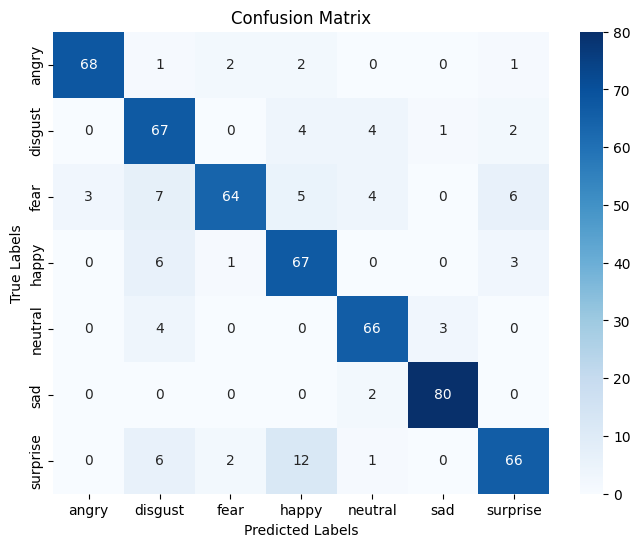

In [141]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Definisi fungsi jarak Euclidean
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Definisi algoritma KNN dari nol
class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Hitung jarak ke semua data latih
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Ambil indeks dari k tetangga terdekat
        k_indices = np.argsort(distances)[:self.k]
        # Ambil label dari k tetangga terdekat
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Voting mayoritas
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Pastikan jumlah fitur konsisten
# Load dataset dengan fitur lengkap
X = audio_df.drop(columns=['Path', 'emotion', 'MFCC'])

# Konversi semua nilai ke tipe float
X = X.astype(float).values
y = audio_df['emotion'].values

# Standarisasi fitur dengan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Simpan scaler ke dalam file
joblib.dump(scaler, 'scaler3.joblib')
print("Scaler berhasil disimpan sebagai 'scaler.joblib'")

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inisialisasi model KNN
knn = KNearestNeighbors(k=5)

# Latih model
knn.fit(X_train, y_train)

# Simpan model ke dalam file
joblib.dump(knn, 'knn_model3.joblib')
print("Model berhasil disimpan sebagai 'knn_model3.joblib'")

# Prediksi pada data uji
y_pred = knn.predict(X_test)

# Evaluasi model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Visualisasi matriks konfusi
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
cm_df = pd.DataFrame(cm, index=np.unique(y), columns=np.unique(y))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [91]:
# import numpy as np
# import pandas as pd
# from collections import Counter
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.decomposition import PCA

# # Definisi fungsi jarak dengan berbagai metrik
# def euclidean_distance(x1, x2):
#     return np.sqrt(np.sum((x1 - x2) ** 2))

# def manhattan_distance(x1, x2):
#     return np.sum(np.abs(x1 - x2))

# def cosine_similarity(x1, x2):
#     return 1 - np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

# class ImprovedKNearestNeighbors:
#     def __init__(self, k=3, distance_metric='euclidean', weights='uniform'):
#         self.k = k
#         self.distance_metric = distance_metric
#         self.weights = weights
        
#     def fit(self, X, y):
#         self.X_train = X
#         self.y_train = y
        
#         # Menyimpan label unik untuk weighted voting
#         self.classes_ = np.unique(y)
        
#     def get_distance(self, x1, x2):
#         if self.distance_metric == 'euclidean':
#             return euclidean_distance(x1, x2)
#         elif self.distance_metric == 'manhattan':
#             return manhattan_distance(x1, x2)
#         elif self.distance_metric == 'cosine':
#             return cosine_similarity(x1, x2)
        
#     def predict(self, X):
#         predictions = [self._predict(x) for x in X]
#         return np.array(predictions)
    
#     def _predict(self, x):
#         # Hitung jarak ke semua data latih
#         distances = [self.get_distance(x, x_train) for x_train in self.X_train]
        
#         # Ambil k tetangga terdekat
#         k_indices = np.argsort(distances)[:self.k]
#         k_nearest_labels = [self.y_train[i] for i in k_indices]
#         k_distances = [distances[i] for i in k_indices]
        
#         if self.weights == 'uniform':
#             # Voting mayoritas biasa
#             most_common = Counter(k_nearest_labels).most_common(1)
#             return most_common[0][0]
#         else:
#             # Weighted voting berdasarkan inverse distance
#             weights = 1 / (np.array(k_distances) + 1e-10)  # Menghindari pembagian dengan nol
#             weighted_votes = {}
            
#             for label, weight in zip(k_nearest_labels, weights):
#                 weighted_votes[label] = weighted_votes.get(label, 0) + weight
                
#             return max(weighted_votes.items(), key=lambda x: x[1])[0]

# # Fungsi untuk preprocessing data
# def preprocess_data(X, y, use_pca=True, n_components=0.95):
#     # Normalisasi data
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)
    
#     if use_pca:
#         # Aplikasikan PCA
#         pca = PCA(n_components=n_components)
#         X_transformed = pca.fit_transform(X_scaled)
#         print(f"Jumlah komponen PCA yang digunakan: {pca.n_components_}")
#         print(f"Variance explained: {sum(pca.explained_variance_ratio_):.3f}")
#         return X_transformed
    
#     return X_scaled

# # Load dan preprocess dataset
# def prepare_data(audio_df):
#     X = audio_df.drop(columns=['Path', 'emotion', 'MFCC', 'Prosodic_Pitch', 'Prosodic_Energy'])
#     X = X.astype(float).values
#     y = audio_df['emotion'].values
    
#     # Preprocessing
#     X_processed = preprocess_data(X, y, use_pca=True)
    
#     # Split data
#     X_train, X_test, y_train, y_test = train_test_split(
#         X_processed, y, test_size=0.2, random_state=42, stratify=y
#     )
    
#     return X_train, X_test, y_train, y_test

# # Fungsi untuk mencari parameter terbaik
# def find_best_parameters(X_train, y_train):
#     k_values = [3, 5, 7, 9, 11]
#     distance_metrics = ['euclidean', 'manhattan', 'cosine']
#     weight_options = ['uniform', 'distance']
    
#     best_accuracy = 0
#     best_params = {}
    
#     for k in k_values:
#         for metric in distance_metrics:
#             for weight in weight_options:
#                 knn = ImprovedKNearestNeighbors(k=k, distance_metric=metric, weights=weight)
#                 knn.fit(X_train, y_train)
#                 train_pred = knn.predict(X_train)
#                 accuracy = accuracy_score(y_train, train_pred)
                
#                 if accuracy > best_accuracy:
#                     best_accuracy = accuracy
#                     best_params = {'k': k, 'distance_metric': metric, 'weights': weight}
    
#     print(f"Parameter terbaik: {best_params}")
#     return best_params

# # Main execution
# def main(audio_df):
#     # Prepare data
#     X_train, X_test, y_train, y_test = prepare_data(audio_df)
    
#     # Find best parameters
#     best_params = find_best_parameters(X_train, y_train)
    
#     # Train final model with best parameters
#     final_model = ImprovedKNearestNeighbors(**best_params)
#     final_model.fit(X_train, y_train)
    
#     # Make predictions
#     y_pred = final_model.predict(X_test)
    
#     # Evaluate model
#     print("\nHasil Evaluasi Model:")
#     print("Akurasi Model:", accuracy_score(y_test, y_pred))
#     print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# # Jalankan model
# main(audio_df)

# Model Random Forest

Model berhasil disimpan sebagai 'random_forest_model3.joblib'
Akurasi Model: 0.7785714285714286

Laporan Klasifikasi:
               precision    recall  f1-score   support

       angry       0.83      0.84      0.83        74
     disgust       0.64      0.81      0.72        78
        fear       0.76      0.76      0.76        89
       happy       0.76      0.83      0.80        77
     neutral       0.85      0.71      0.78        73
         sad       0.94      0.89      0.91        82
    surprise       0.73      0.62      0.67        87

    accuracy                           0.78       560
   macro avg       0.79      0.78      0.78       560
weighted avg       0.79      0.78      0.78       560



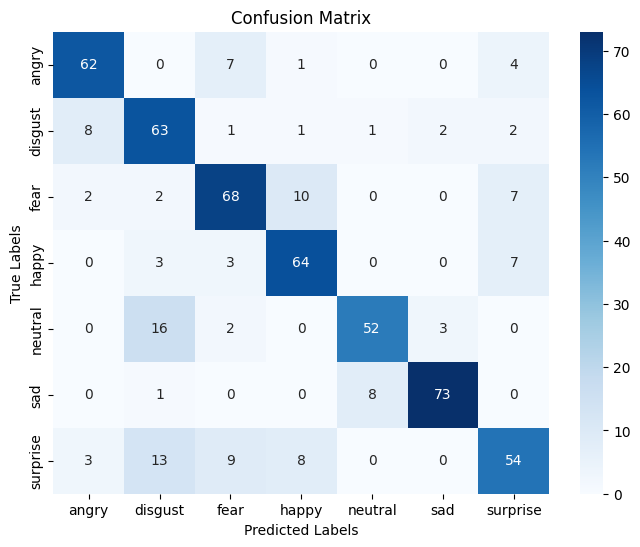

In [142]:
import numpy as np
from collections import Counter
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menghitung entropi
def hitung_entropi(y):
    label, jumlah = np.unique(y, return_counts=True)
    proporsi = jumlah / len(y)
    return -np.sum(proporsi * np.log2(proporsi))

# Fungsi untuk mempartisi dataset
def partisi(data, fitur, nilai):
    data_kiri = data[data[:, fitur] <= nilai]
    data_kanan = data[data[:, fitur] > nilai]
    return data_kiri, data_kanan

# Fungsi untuk menemukan split terbaik
def cari_split_terbaik(data):
    n_fitur = data.shape[1] - 1  # Kolom terakhir adalah label
    entropi_terbaik = float("inf")
    split_terbaik = None

    for fitur in range(n_fitur):
        nilai_unik = np.unique(data[:, fitur])
        for nilai in nilai_unik:
            data_kiri, data_kanan = partisi(data, fitur, nilai)
            if len(data_kiri) > 0 and len(data_kanan) > 0:
                proporsi_kiri = len(data_kiri) / len(data)
                proporsi_kanan = len(data_kanan) / len(data)
                entropi_split = (proporsi_kiri * hitung_entropi(data_kiri[:, -1]) +
                                 proporsi_kanan * hitung_entropi(data_kanan[:, -1]))
                if entropi_split < entropi_terbaik:
                    entropi_terbaik = entropi_split
                    split_terbaik = {
                        "fitur": fitur,
                        "nilai": nilai,
                        "data_kiri": data_kiri,
                        "data_kanan": data_kanan
                    }
    return split_terbaik

# Node Pohon Keputusan
class Node:
    def __init__(self, fitur=None, nilai=None, label=None, data_kiri=None, data_kanan=None):
        self.fitur = fitur
        self.nilai = nilai
        self.label = label
        self.data_kiri = data_kiri
        self.data_kanan = data_kanan

# Fungsi untuk membangun pohon keputusan
def bangun_pohon(data, max_kedalaman, kedalaman=0):
    label, jumlah = np.unique(data[:, -1], return_counts=True)
    if len(label) == 1 or kedalaman == max_kedalaman:
        return Node(label=label[np.argmax(jumlah)])

    split = cari_split_terbaik(data)
    if not split:
        return Node(label=label[np.argmax(jumlah)])

    node = Node(fitur=split["fitur"], nilai=split["nilai"])
    node.data_kiri = bangun_pohon(split["data_kiri"], max_kedalaman, kedalaman + 1)
    node.data_kanan = bangun_pohon(split["data_kanan"], max_kedalaman, kedalaman + 1)
    return node

# Fungsi untuk prediksi
def prediksi_satu(data, pohon):
    if pohon.label is not None:
        return pohon.label
    if data[pohon.fitur] <= pohon.nilai:
        return prediksi_satu(data, pohon.data_kiri)
    else:
        return prediksi_satu(data, pohon.data_kanan)

# Fungsi Random Forest
class RandomForest:
    def __init__(self, n_pohon=10, max_kedalaman=5):
        self.n_pohon = n_pohon
        self.max_kedalaman = max_kedalaman
        self.hutan = []

    def pelatihan(self, data):
        n_sampel = data.shape[0]
        for _ in range(self.n_pohon):
            indeks_acak = np.random.choice(n_sampel, n_sampel, replace=True)
            data_bootstrap = data[indeks_acak]
            pohon = bangun_pohon(data_bootstrap, self.max_kedalaman)
            self.hutan.append(pohon)

    def predict(self, X):
        all_predictions = []
        for pohon in self.hutan:
            prediksi_pohon = [prediksi_satu(x, pohon) for x in X]
            all_predictions.append(prediksi_pohon)

        all_predictions = np.array(all_predictions).T
        final_predictions = [Counter(row).most_common(1)[0][0] for row in all_predictions]
        return np.array(final_predictions)

# Data dan proses training
X = audio_df.drop(columns=['Path', 'emotion', 'MFCC']).astype(float).values
y = audio_df['emotion'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForest(n_pohon=10, max_kedalaman=5)
data_train = np.column_stack((X_train, y_train))
random_forest.pelatihan(data_train)

joblib.dump(random_forest, 'random_forest_model3.joblib')
print("Model berhasil disimpan sebagai 'random_forest_model3.joblib'")

# Evaluasi dan visualisasi
y_pred = random_forest.predict(X_test)

print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Matriks Konfusi
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
cm_df = pd.DataFrame(cm, index=np.unique(y), columns=np.unique(y))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Model Decision Tree

LabelEncoder berhasil disimpan sebagai 'label_encoder.joblib'
Model berhasil disimpan sebagai 'decision_tree_model3.joblib'
Model dan LabelEncoder berhasil dimuat kembali


C:\Users\LOQ\AppData\Local\Temp\ipykernel_15476\227677746.py:214: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


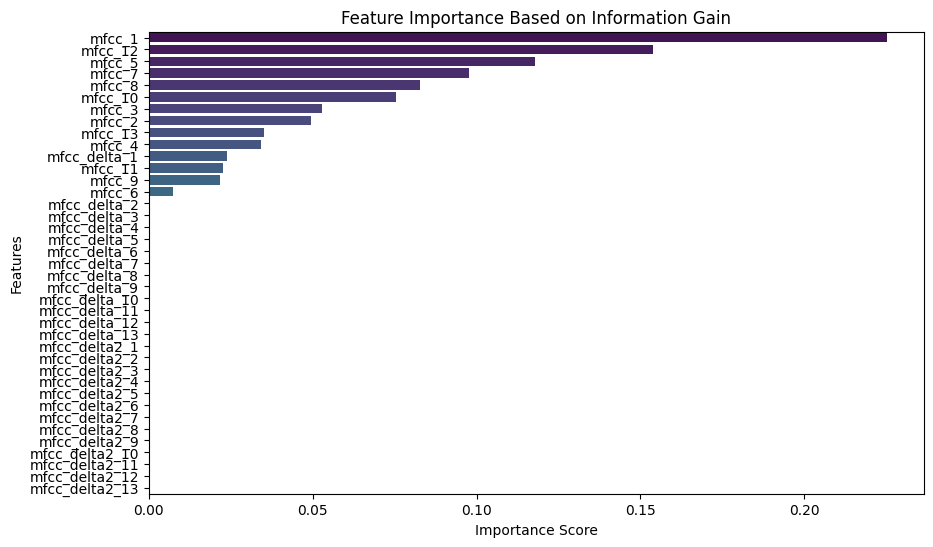

Akurasi Model: 0.725

Laporan Klasifikasi:
               precision    recall  f1-score   support

       angry       0.79      0.76      0.77        74
     disgust       0.57      0.78      0.66        78
        fear       0.72      0.73      0.73        89
       happy       0.66      0.74      0.70        77
     neutral       0.87      0.63      0.73        73
         sad       0.94      0.93      0.93        82
    surprise       0.62      0.52      0.57        87

    accuracy                           0.72       560
   macro avg       0.74      0.73      0.73       560
weighted avg       0.74      0.72      0.73       560



In [143]:
import numpy as np
from typing import List, Tuple
from dataclasses import dataclass
import joblib  # Impor pustaka joblib untuk menyimpan model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

@dataclass
class TreeNode:
    """Node structure for decision tree"""
    feature_idx: int = None
    threshold: float = None
    left: any = None
    right: any = None
    value: any = None
    gain: float = None

class DecisionTree:
    """
    Decision Tree Classifier implementation
    """
    def __init__(self, max_depth=4, min_samples_leaf=1, min_information_gain=0.0):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_information_gain = min_information_gain
        self.root = None
        self.n_classes = None

    def entropy(self, class_probabilities: List[float]) -> float:
        return -np.sum([p * np.log2(p) for p in class_probabilities if p > 0])

    def class_probabilities(self, labels: List) -> List[float]:
        total_count = len(labels)
        unique_labels, counts = np.unique(labels, return_counts=True)
        probabilities = counts / total_count
        return probabilities

    def data_entropy(self, labels: List) -> float:
        probabilities = self.class_probabilities(labels)
        return self.entropy(probabilities)

    def partition_entropy(self, subsets: List) -> float:
        total_count = sum(len(subset) for subset in subsets)
        weights = [len(subset) / total_count for subset in subsets]
        entropies = [self.data_entropy(subset[:, -1]) for subset in subsets]
        return sum(w * e for w, e in zip(weights, entropies))

    def split(self, data: np.array, feature_idx: int, threshold: float) -> Tuple:
        left_mask = data[:, feature_idx] <= threshold
        right_mask = ~left_mask
        return data[left_mask], data[right_mask]

    def find_best_split(self, data: np.array) -> Tuple:
        n_features = data.shape[1] - 1
        parent_entropy = self.data_entropy(data[:, -1])
        best_gain = -1
        best_split = None

        for feature_idx in range(n_features):
            thresholds = np.unique(data[:, feature_idx])

            for threshold in thresholds:
                left_data, right_data = self.split(data, feature_idx, threshold)
                if len(left_data) < self.min_samples_leaf or len(right_data) < self.min_samples_leaf:
                    continue

                split_entropy = self.partition_entropy([left_data, right_data])
                information_gain = parent_entropy - split_entropy

                if information_gain > best_gain and information_gain > self.min_information_gain:
                    best_gain = information_gain
                    best_split = (feature_idx, threshold, information_gain)

        return best_split

    def find_label_probs(self, data: np.array) -> np.array:
        label_counts = np.bincount(data[:, -1].astype(int), minlength=self.n_classes)
        return label_counts / len(data)

    def create_tree(self, data: np.array, current_depth: int) -> TreeNode:
        node = TreeNode()
        if (current_depth >= self.max_depth or
            len(data) < 2 * self.min_samples_leaf or
            len(np.unique(data[:, -1])) == 1):
            node.value = self.find_label_probs(data)
            return node

        best_split = self.find_best_split(data)
        if best_split is None:
            node.value = self.find_label_probs(data)
            return node

        feature_idx, threshold, gain = best_split
        left_data, right_data = self.split(data, feature_idx, threshold)

        node.feature_idx = feature_idx
        node.threshold = threshold
        node.gain = gain
        node.left = self.create_tree(left_data, current_depth + 1)
        node.right = self.create_tree(right_data, current_depth + 1)

        return node

    def predict_one_sample(self, x: np.array) -> np.array:
        node = self.root
        while node.value is None:
            if x[node.feature_idx] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def predict_proba(self, X: np.array) -> np.array:
        return np.array([self.predict_one_sample(x) for x in X])

    def predict(self, X: np.array) -> np.array:
        return np.argmax(self.predict_proba(X), axis=1)

    def train(self, X_train: np.array, y_train: np.array) -> None:
        self.n_classes = len(np.unique(y_train))
        data = np.column_stack([X_train, y_train])
        self.root = self.create_tree(data, current_depth=0)

    def print_tree(self) -> None:
        def print_recursive(node: TreeNode, level: int = 0):
            indent = "  " * level
            if node.value is not None:
                print(f"{indent}Leaf: class probabilities = {node.value}")
                return
            print(f"{indent}Split: feature {node.feature_idx}, threshold = {node.threshold:.4f}, gain = {node.gain:.4f}")
            print(f"{indent}Left:")
            print_recursive(node.left, level + 1)
            print(f"{indent}Right:")
            print_recursive(node.right, level + 1)

        print("Decision Tree Structure:")
        print_recursive(self.root)



from sklearn.preprocessing import LabelEncoder

X = audio_df.drop(columns=['Path', 'emotion', 'MFCC'])
X = X.astype(float).values
y = audio_df['emotion'].values

# Konversi label string menjadi angka
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Simpan LabelEncoder ke dalam file
joblib.dump(label_encoder, 'label_encoder.joblib')
print("LabelEncoder berhasil disimpan sebagai 'label_encoder.joblib'")

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Decision Tree
decision_tree = DecisionTree(max_depth=5, min_samples_leaf=1, min_information_gain=0.0)
decision_tree.train(X_train, y_train)

# Simpan model Decision Tree ke dalam file
joblib.dump(decision_tree, 'decision_tree_model3.joblib')
print("Model berhasil disimpan sebagai 'decision_tree_model3.joblib'")

# Muat kembali model Decision Tree dan LabelEncoder
loaded_model = joblib.load('decision_tree_model3.joblib')
loaded_label_encoder = joblib.load('label_encoder.joblib')
print("Model dan LabelEncoder berhasil dimuat kembali")

# Prediksi menggunakan model
y_pred_classes = loaded_model.predict(X_test)

# Konversi kelas angka menjadi nama emosi
y_pred_emotions = loaded_label_encoder.inverse_transform(y_pred_classes)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def feature_importance(tree: DecisionTree, n_features: int) -> np.array:
    """
    Menghitung importance score fitur berdasarkan information gain.
    """
    importance = np.zeros(n_features)

    def traverse(node: TreeNode):
        if node.gain is not None:
            importance[node.feature_idx] += node.gain
        if node.left:
            traverse(node.left)
        if node.right:
            traverse(node.right)

    traverse(tree.root)
    return importance

# Hitung skor kontribusi fitur
n_features = X_train.shape[1]
feature_scores = feature_importance(decision_tree, n_features)

# Normalisasi skor untuk menghasilkan persentase
feature_scores = feature_scores / feature_scores.sum()

# Buat DataFrame untuk visualisasi
feature_names = audio_df.drop(columns=['Path', 'emotion', 'MFCC']).columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_scores})

# Sortir berdasarkan importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Visualisasi importance sebagai heatmap
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance Based on Information Gain')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
# Evaluasi model
print("Akurasi Model:", accuracy_score(y_test, y_pred_classes))
print("\nLaporan Klasifikasi:\n", classification_report(
    y_test, y_pred_classes, target_names=loaded_label_encoder.classes_))

# Penggabungan Model

In [94]:
# import numpy as np
# import joblib  # Untuk memuat model
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import Counter

In [95]:
# import joblib
# import numpy as np
# from typing import List, Tuple
# from dataclasses import dataclass
# import pandas as pd

# # Ensemble model hard voting
# dt_model = joblib.load('decision_tree_model.joblib')
# knn_model = joblib.load('knn_model.joblib')
# rf_model = joblib.load('random_forest_modell.joblib')


In [96]:
# X = data_audio_df.drop('emotion', axis=1).to_numpy()
# y = data_audio_df['emotion'].to_numpy()

# # Membagi data menjadi data latih dan uji
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [97]:
# y_pred_dt = dt_model.predict(X_test)
# y_pred_rf = rf_model.pelatihan(X_test)
# y_pred_knn = knn_model.predict(X_test)

# Test Prediksi

In [145]:
import librosa
import numpy as np
import joblib

# Fungsi untuk ekstraksi fitur dari file suara
def extract_features(file_path):
    audio, src = librosa.load(file_path)
    
    # MFCC
    mfccs = librosa.feature.mfcc(y=audio, sr=src, n_mfcc=13)
    mfccs = np.mean(mfccs.T, axis=0)
    
    # Chroma
    chroma = librosa.feature.chroma_stft(y=audio, sr=src)
    mean_chroma = np.mean(chroma, axis=1)
    
    # Delta
    mfccs_delta = librosa.feature.delta(librosa.feature.mfcc(y=audio, sr=src, n_mfcc=13))
    mfccs_delta = np.mean(mfccs_delta.T, axis=0)
    
    # Delta2
    mfccs_delta2 = librosa.feature.delta(librosa.feature.mfcc(y=audio, sr=src, n_mfcc=13), order=2)
    mfccs_delta2 = np.mean(mfccs_delta2.T, axis=0)
    
    # Gabungkan semua fitur
    features = np.concatenate([mfccs, mfccs_delta, mfccs_delta2])
    return features

# Path file suara yang akan diuji
file_to_predict = r"dataset\AudioWAV\1091_MTI_SAD_XX.wav"

# Ekstraksi fitur dari file
features = extract_features(file_to_predict)
print(f"Fitur diekstraksi: {features.shape[0]} fitur ditemukan.")

# Load model KNN
knn = joblib.load('knn_model3.joblib')
print("Model KNN berhasil dimuat.")

# Load scaler yang digunakan pada data pelatihan
scaler = joblib.load('scaler3.joblib')  # Pastikan scaler telah disimpan sebelumnya
print("Scaler berhasil dimuat.")

# Standarisasi fitur
features_scaled = scaler.transform([features])
print("Fitur berhasil distandarisasi.")

# Prediksi emosi
predicted_emotion = knn.predict(features_scaled)

# Hasil prediksi
print(f"Emosi yang terdeteksi: {predicted_emotion[0]}")


Fitur diekstraksi: 39 fitur ditemukan.
Model KNN berhasil dimuat.
Scaler berhasil dimuat.
Fitur berhasil distandarisasi.
Emosi yang terdeteksi: sad


In [146]:
import numpy as np
import librosa
import joblib
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Fungsi ekstraksi fitur
def extract_features(file_path):
    audio, src = librosa.load(file_path)
    
    # MFCC
    mfccs = librosa.feature.mfcc(y=audio, sr=src, n_mfcc=13)
    mfccs = np.mean(mfccs.T, axis=0)
    
    # Delta
    mfccs_delta = librosa.feature.delta(librosa.feature.mfcc(y=audio, sr=src, n_mfcc=13))
    mfccs_delta = np.mean(mfccs_delta.T, axis=0)
    
    # Delta2
    mfccs_delta2 = librosa.feature.delta(librosa.feature.mfcc(y=audio, sr=src, n_mfcc=13), order=2)
    mfccs_delta2 = np.mean(mfccs_delta2.T, axis=0)
    
    # Gabungkan semua fitur
    features = np.concatenate([mfccs, mfccs_delta, mfccs_delta2])
    return features

# Node Pohon Keputusan
class Node:
    def __init__(self, fitur=None, nilai=None, label=None, data_kiri=None, data_kanan=None):
        self.fitur = fitur
        self.nilai = nilai
        self.label = label
        self.data_kiri = data_kiri
        self.data_kanan = data_kanan

# Fungsi Random Forest
class RandomForest:
    def __init__(self, n_pohon=10, max_kedalaman=5):
        self.n_pohon = n_pohon
        self.max_kedalaman = max_kedalaman
        self.hutan = []

    def pelatihan(self, data):
        n_sampel = data.shape[0]
        for _ in range(self.n_pohon):
            indeks_acak = np.random.choice(n_sampel, n_sampel, replace=True)
            data_bootstrap = data[indeks_acak]
            pohon = bangun_pohon(data_bootstrap, self.max_kedalaman)
            self.hutan.append(pohon)

    def predict(self, X):
        all_predictions = []
        for pohon in self.hutan:
            prediksi_pohon = [prediksi_satu(x, pohon) for x in X]
            all_predictions.append(prediksi_pohon)
        all_predictions = np.array(all_predictions).T
        final_predictions = [Counter(row).most_common(1)[0][0] for row in all_predictions]
        return np.array(final_predictions)

# Fungsi bangun pohon keputusan dan prediksi_satu (definisi sama seperti di kode awal)

# Path file suara yang akan diuji
file_to_predict = r"dataset\RAVDESS\Actor_24\03-01-08-02-01-01-24.wav"

# Ekstraksi fitur dari file
features = extract_features(file_to_predict)
print(f"Fitur diekstraksi: {features.shape[0]} fitur ditemukan.")

# # Load scaler
# scaler = joblib.load('scaler2.joblib')
# print("Scaler berhasil dimuat.")

# Standarisasi fitur
features_scaled = scaler.transform([features])
print("Fitur berhasil distandarisasi.")

# Load model Random Forest
random_forest = joblib.load('random_forest_model3.joblib')
print("Model Random Forest berhasil dimuat.")

# Prediksi emosi
predicted_emotion = random_forest.predict(features_scaled)
print(f"Emosi yang terdeteksi: {predicted_emotion[0]}")


Fitur diekstraksi: 39 fitur ditemukan.
Fitur berhasil distandarisasi.
Model Random Forest berhasil dimuat.
Emosi yang terdeteksi: fear


In [148]:
import numpy as np
import librosa
import joblib
from sklearn.preprocessing import StandardScaler

# Fungsi untuk ekstraksi fitur dari file suara
def extract_features(file_path):
    audio, src = librosa.load(file_path)
    
    # MFCC
    mfccs = librosa.feature.mfcc(y=audio, sr=src, n_mfcc=13)
    mfccs = np.mean(mfccs.T, axis=0)
    
    # Delta
    mfccs_delta = librosa.feature.delta(librosa.feature.mfcc(y=audio, sr=src, n_mfcc=13))
    mfccs_delta = np.mean(mfccs_delta.T, axis=0)
    
    # Delta2
    mfccs_delta2 = librosa.feature.delta(librosa.feature.mfcc(y=audio, sr=src, n_mfcc=13), order=2)
    mfccs_delta2 = np.mean(mfccs_delta2.T, axis=0)
    
    # Gabungkan semua fitur
    features = np.concatenate([mfccs, mfccs_delta, mfccs_delta2])
    return features

# Path file suara yang akan diuji
file_to_predict = r"dataset\AudioWAV\1091_MTI_SAD_XX.wav"

# Ekstraksi fitur dari file
features = extract_features(file_to_predict)
print(f"Fitur diekstraksi: {features.shape[0]} fitur ditemukan.")

# Load scaler yang digunakan pada data pelatihan
scaler = joblib.load('scaler3.joblib')
print("Scaler berhasil dimuat.")

# Standarisasi fitur
features_scaled = scaler.transform([features])
print("Fitur berhasil distandarisasi.")

# Load LabelEncoder
label_encoder = joblib.load('label_encoder.joblib')
print("LabelEncoder berhasil dimuat.")

# Prediksi kelas (dalam angka)
predicted_class = decision_tree.predict(features_scaled)

# Load model Decision Tree
decision_tree = joblib.load('decision_tree_model3.joblib')
print("Model Decision Tree berhasil dimuat.")

# Prediksi emosi
predicted_probs = decision_tree.predict_proba(features_scaled)
predicted_class = decision_tree.predict(features_scaled)

# Konversi kelas angka menjadi nama emosi
predicted_emotion = label_encoder.inverse_transform(predicted_class)
print(f"Emosi yang terdeteksi: {predicted_emotion[0]}")


Fitur diekstraksi: 39 fitur ditemukan.
Scaler berhasil dimuat.
Fitur berhasil distandarisasi.
LabelEncoder berhasil dimuat.
Model Decision Tree berhasil dimuat.
Emosi yang terdeteksi: fear


In [125]:
# # Path file audio
# audio_file_path = "dataset/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav"

# # Ekstrak fitur
# features = extract_features(audio_file_path)

# # Reshape fitur untuk prediksi (1 sampel, banyak fitur)
# features = features.reshape(1, -1)

# # Prediksi emosi
# predicted_emotion = knn_model.predict(features)
# print(f"Prediksi Emosi: {predicted_emotion[0]}")
